## Imports section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the data set CSV file

In [ ]:
df = pd.read_csv('all_games.csv')

In [ ]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


## Removing duplicates values

In [ ]:
df.drop_duplicates(inplace=True)

## Dealing with NaN values

In [ ]:
games_with_na = df[df.isna().any(axis=1)]


# Print the games with NaN values
if not games_with_na.empty:
    print("Games with missing values:")
    # print(games_with_na["name"])
else:
    print("No missing values found in the dataset.")
print(df[df["name"] == "Injustice 2: Legendary Edition"])

Games with missing values:
                               name        platform    release_date summary  \
833  Injustice 2: Legendary Edition   PlayStation 4  March 27, 2018     NaN   

     meta_score user_review  
833          88         7.6  


In [ ]:
df.fillna('Summary not available', inplace=True)

In [ ]:
df["user_review"] = pd.to_numeric(df['user_review'], errors='coerce')


In [ ]:
mean_user_review = df['user_review'].mean()
df['user_review'].fillna(mean_user_review, inplace=True)

<ipython-input-31-65be68dc7b87>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_review'].fillna(mean_user_review, inplace=True)


In [ ]:
df['meta_score'] = df['meta_score'].astype(np.float64)
df['meta_score'] = df['meta_score'] / 10

In [ ]:
df.describe()

,meta_score,user_review
count,18800.000000,18800.000000
mean,7.064888,6.990846
std,1.222501,1.301561
min,2.000000,0.200000
25%,6.400000,6.400000
50%,7.200000,7.200000
75%,8.000000,7.900000
max,9.900000,9.700000


## Dealing with outliers

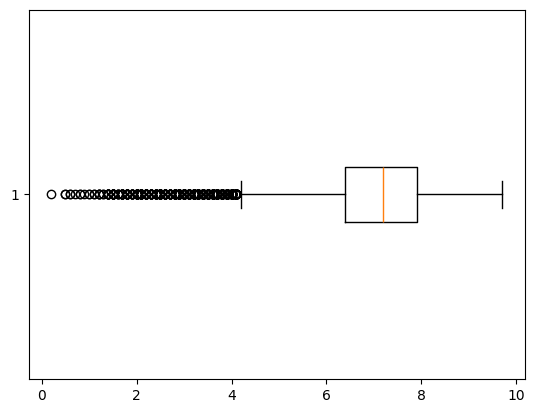

In [ ]:
plt.boxplot(df['user_review'], vert=False)
plt.show()

In [ ]:
Q1 = df['user_review'].quantile(0.25)
Q3 = df['user_review'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR).round(2)
upper_bound = (Q3 + 1.5 * IQR).round(2)



In [ ]:
df['user_review'].clip(lower=lower_bound, upper=upper_bound, inplace=True)
df['meta_score'].clip(lower=lower_bound, upper=upper_bound, inplace=True)

<ipython-input-52-1c09dc288018>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_review'].clip(lower=lower_bound, upper=upper_bound, inplace=True)
<ipython-input-52-1c09dc288018>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
df.describe()

,meta_score,user_review
count,18800.000000,18800.000000
mean,7.079931,7.031264
std,1.179548,1.181433
min,4.150000,4.150000
25%,6.400000,6.400000
50%,7.200000,7.200000
75%,8.000000,7.900000
max,9.900000,9.700000
